# Application Example of the 2L-FUSE procedure
## Replicating example f_1

In [9]:
## Import the needed libraries and/or functions
import numpy as np
from Dictionary import param_definition
from auxiliary_functions import create_dataset
from auxiliary_functions import run_A_optimization
from auxiliary_functions import build_new_data
from auxiliary_functions import regression_metrics
from kernel_interp import KernelInterp
import matplotlib.pyplot as plt

### Dataset preparation and hyperparameter configuration

In [10]:
## Build dataset
X, Y = create_dataset()
features_labels = [f'x_{i+1}' for i in range(X.shape[1])]

Built 50000 data points in dimension 35.
Built target function with 6 relevant dimensions.


In [11]:
## Select kernel name: possible options are 'gaussian', 'mat0' and 'mat2'
kernel_str = 'gaussian'

hyperparameter = param_definition()[0]

if kernel_str=='mat0':
    epsilon = hyperparameter.shape_para_matern0
    kernel_type_str_ = str(kernel_str)+f'_k_{hyperparameter.shape_para_matern0}'
    kernel_color = 'green'
    kernel_marker = '^'
elif kernel_str=='mat2':
    epsilon = hyperparameter.shape_para_matern2
    kernel_type_str_ = str(kernel_str)+f'_k_{hyperparameter.shape_para_matern2}'
    kernel_color = 'red'
    kernel_marker = 's'
elif kernel_str == 'gaussian':
    epsilon = hyperparameter.shape_para_gaussian
    kernel_type_str_ = str(kernel_str)+f'_shape_para_{hyperparameter.shape_para_gaussian}'
    kernel_color = 'blue'
    kernel_marker = 'o'

### Optimization

In [12]:
## Run A optimization 

# SELECT HERE whether to use diagonal optimization: possible options are flag_diag_A = True and flag_diag_A = False
flag_diag_A = False 

A_opt, X_train_ALL, Y_train, X_test_ALL, Y_test, indices_TRAIN, indices_TEST = run_A_optimization(X, Y, flag_diag_A, kernel_type=kernel_str)

Preparing for A optimization with GAUSSIAN (GA) KERNEL
Selected case is NON-DIAGONAL
Split the starting dataset into 80% TRAIN and 20% TEST.
*** Starting optimization ***
First epoch: Iteration     0: Training objective: 4.699e-01
First epoch: Iteration     1: Training objective: 3.751e-01
First epoch: Iteration     2: Training objective: 3.699e-01
First epoch: Iteration     3: Training objective: 4.890e-01
First epoch: Iteration     4: Training objective: 3.770e-01
First epoch: Iteration     5: Training objective: 3.443e-01
First epoch: Iteration     6: Training objective: 4.308e-01
First epoch: Iteration     7: Training objective: 4.450e-01
First epoch: Iteration     8: Training objective: 3.284e-01
First epoch: Iteration     9: Training objective: 4.128e-01
First epoch: Iteration    10: Training objective: 4.804e-01
First epoch: Iteration    11: Training objective: 4.046e-01
First epoch: Iteration    12: Training objective: 4.558e-01
First epoch: Iteration    13: Training objective:

In [13]:
if flag_diag_A:
    print('Diagonal of optimized A:\n', np.diag(A_opt))
else:
    print('Optimized A:\n', A_opt)

Optimized A:
 [[ 4.8190558e-01  4.5971796e-01  4.5750237e-01 ... -2.9643311e-03
  -1.6344041e-03 -6.4988522e-04]
 [ 4.6082672e-01  4.7496289e-01  4.5963183e-01 ...  4.1108243e-03
  -1.5678013e-02 -1.7186244e-03]
 [ 4.6159518e-01  4.5530120e-01  4.8365739e-01 ... -2.9547578e-03
   1.5515522e-02  4.0118834e-03]
 ...
 [ 2.3521101e-03  3.7967220e-05  6.6309876e-04 ... -1.3061118e-03
   1.9458378e-03 -2.7876759e-03]
 [ 4.1530206e-05  2.2893252e-03 -4.9659172e-03 ...  5.5908980e-03
  -9.4979507e-04 -2.5098110e-03]
 [ 3.0621067e-03 -1.3186710e-03  1.5886411e-03 ... -3.2992524e-03
  -4.2846613e-03 -5.6963651e-03]]


Eigenvalues of M:
 [7.65962362e+00 6.38035312e-03 4.74722963e-03 2.88714771e-03
 2.44242512e-03 1.60576380e-03 1.44832069e-03 1.28005026e-03
 1.11338159e-03 8.88872368e-04 7.47042708e-04 6.74304727e-04
 5.91832271e-04 5.07794495e-04 4.22583398e-04 3.82653554e-04
 3.66163586e-04 2.90435273e-04 2.19400434e-04 1.94913926e-04
 1.73679320e-04 9.91188863e-05 9.49163878e-05 4.40033946e-05
 3.09679381e-05 2.28090867e-05 9.65853906e-06 5.85509952e-06
 4.15043542e-06 1.35918003e-06 7.67940151e-07 3.07030632e-07
 1.75977831e-07 1.19890275e-08 3.99629165e-08]


*** Building total number of new features: 10 ***
---------------- Building 1st linear combination...
Index k for eigenvalue and eigenvector selection: 0
Corresponding eigenvalue: 7.659623622894287
Corresponding eigenvector:
[-4.0821144e-01 -4.0743518e-01 -4.0991122e-01 -4.0689451e-01
 -4.0853795e-01 -4.0846753e-01  7.1652723e-04 -1.0539389e-03
 -7.4187573e-04  1.4267254e-03  1.8225226e-03  9.5559162e-04
  9.8438864e-04  3.1345271e-04  8.98

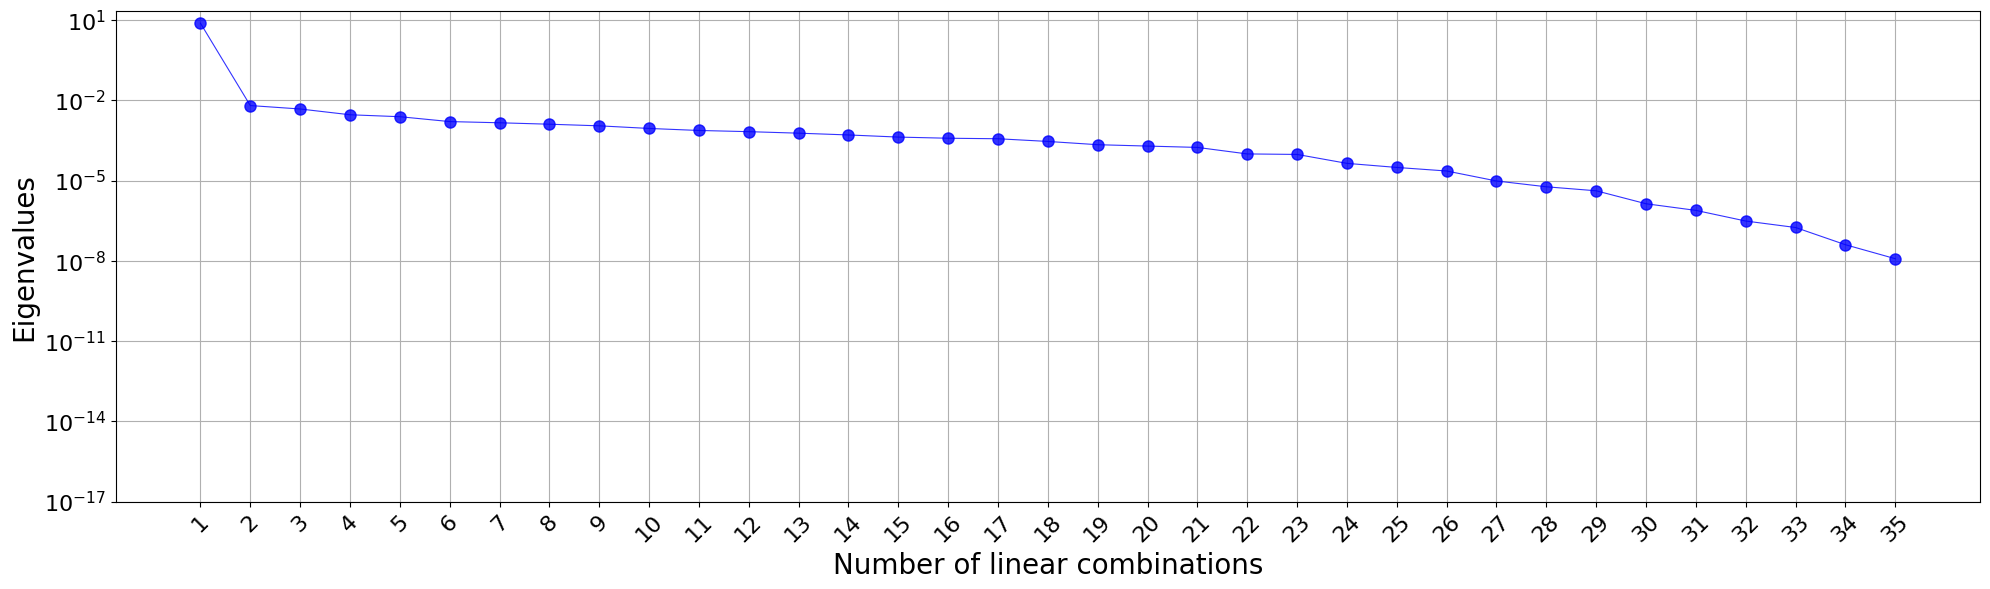

In [14]:
## Build the reduced dataset (i.e., the mapped points)

# DEFINE HERE the threshold to choose eigenvalues ​​after optimization
thresh_eigenvalues = 1e-02

# DEFINE HERE the number of linear combinations to build (non-diagonal case only)
num_lin_comb = 10

if flag_diag_A:
    X_reduced = build_new_data(X, features_labels, A_opt, flag_diag_A, plot_color=kernel_color, marker=kernel_marker, threshold_eigenvalues=thresh_eigenvalues)
else:
    X_reduced = build_new_data(X, features_labels, A_opt, flag_diag_A, plot_color=kernel_color, marker=kernel_marker, reduced_dim=num_lin_comb, threshold_eigenvalues=None)


### Regression 

In [15]:
## Run regression tests with reduced dataset

# Some parameters for the kernel interpolant
smoothing = hyperparameter.reg_para
nNeighbors = 24

if flag_diag_A:

    X_reduced_TRAIN = X_reduced[indices_TRAIN]
    X_reduced_TEST = X_reduced[indices_TEST]
    
    pred_TEST_reduced = KernelInterp(X_reduced_TRAIN,X_reduced_TEST,epsilon,Y_train,nNeighbors,smoothing,which_kernel_=kernel_str)
    _, RMSE_reduced = regression_metrics(Y_test, pred_TEST_reduced)

    print(f'RMSE with selected (relevant) features: {RMSE_reduced}')

else:

    # Initialize list to save performance scores
    RMSE_comb = []

    for j in range(num_lin_comb):

        X_reduced_j_TRAIN = X_reduced[indices_TRAIN,0:j+1]
        X_reduced_j_TEST = X_reduced[indices_TEST,0:j+1]
        
        if j==0:
            X_reduced_j_TRAIN = X_reduced_j_TRAIN.reshape(-1,1)
            X_reduced_j_TEST = X_reduced_j_TEST.reshape(-1,1)

        pred_TEST_reduced_j = KernelInterp(X_reduced_j_TRAIN,X_reduced_j_TEST,epsilon,Y_train,nNeighbors,smoothing,which_kernel_=kernel_str)

        _, RMSE_reduced_j = regression_metrics(Y_test, pred_TEST_reduced_j)

        RMSE_comb.append(RMSE_reduced_j)

        if j==0:
            print(f'RMSE with {j+1} linear combination: {RMSE_reduced_j}')
        else:
            print(f'RMSE with {j+1} linear combinations: {RMSE_reduced_j}')


RMSE with 1 linear combination: 0.002282859428581819
RMSE with 2 linear combinations: 0.0017888210660742994
RMSE with 3 linear combinations: 0.0018054971270476579
RMSE with 4 linear combinations: 0.0018249064326255325
RMSE with 5 linear combinations: 0.0018625978699007364
RMSE with 6 linear combinations: 0.001901298363184374
RMSE with 7 linear combinations: 0.0019061553660922495
RMSE with 8 linear combinations: 0.0018258934399297143
RMSE with 9 linear combinations: 0.001760487997324775
RMSE with 10 linear combinations: 0.0017874080077256256


In [16]:
## Run regression test with all features (original dataset)

pred_TEST_ALL = KernelInterp(X_train_ALL,X_test_ALL,epsilon,Y_train,nNeighbors,smoothing,which_kernel_=kernel_str)
_, RMSE_ALL = regression_metrics(Y_test, pred_TEST_ALL)

print(f'RMSE with all features: {RMSE_ALL}')

RMSE with all features: 0.28150879172505583
